# Milestone 2: Political Wikipedia Edit trends

Oliver Orejola

The website in which the analysis is located can be found  [here](https://oliverorejolacmps3160.github.io.).

## Project Plan

The goal of this project is to investigate time series trends in wikipedia page edits for key US political figures as well as their parties. In particular, I am interestined in studying if there exists some periodicity in the edits made to these wikipedia pages. Namely, are the frequency of edits corellated with election cycles? Can we model the edits with a trend plus noise model?

## Project Datasets
The project considers two data sets. From Milestone 1 we have the [Monthly wikimedia editor activity data set](https://meta.wikimedia.org/wiki/Research:Monthly_wikimedia_editor_activity_dataset). This data set includes the following information: 
* wiki -- The dbname of the wiki in question ("enwiki" == English Wikipedia, "commonswiki" == Commons)
* month -- YYYYMM
* user_id -- The user's identifier in the local wiki
* user_name -- The user name in the local wiki (from the 'user' table)
* user_registration -- The recorded registration date for the user in the 'user' table
* archived -- The count of deleted revisions saved in this month by this user
* revisions -- The count of all revisions saved in this month by this user (archived or not)
* attached_method -- The method by which this user attached this account to their global account

The last complete month in the dataset is June, 2015.

The more informative data set used are edit history for a hand ful of specific political figures/parties wikipedia pages. The data sets used are scraped from [https://xtools.wmflabs.org](https://xtools.wmflabs.org) for a handful of wiki pages.
* Joe Biden - [https://xtools.wmflabs.org/articleinfo/en.wikipedia.org/Joe_Biden](https://xtools.wmflabs.org/articleinfo/en.wikipedia.org/Joe_Biden)
* Donald Trump - [https://xtools.wmflabs.org/articleinfo/en.wikipedia.org/Donald_Trump](https://xtools.wmflabs.org/articleinfo/en.wikipedia.org/Donald_Trump)
* Hillary Clinton - [https://xtools.wmflabs.org/articleinfo/en.wikipedia.org/Hillary_Clinton](https://xtools.wmflabs.org/articleinfo/en.wikipedia.org/Hillary_Clinton)
* Barack Obama - https://xtools.wmflabs.org/articleinfo/en.wikipedia.org/Barack_Obama
* Democrat Party - https://xtools.wmflabs.org/articleinfo/en.wikipedia.org/Democratic_Party_(United_States)
* Republican Party - https://xtools.wmflabs.org/articleinfo/en.wikipedia.org/Republican_Party_(United_States)

For each page the scraped data consists of the following information:
* month -- YYYY-MM
* Edits -- Total Number of Edits
* IPs -- Edits made while masking IP address
* IPs % -- Percentage of IP Edits
* Minor Edits -- Edits consider that only correct superficial differences exist between the current and previous version, e.g. typographical errors, formatting, etc.
* Minor Edits % -- Percentage of Minor Edits

## Extraction, Transform, and Load

First, we extract the code from https://xtools.wmflabs.org.

In [44]:
# Import relevant libraries For Extraction
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Define Header for request.get to get around 403 error code
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}

In [56]:
page_names = ['Joe_Biden','Donald_Trump','Hillary_Clinton','Barack_Obama','Democratic_Party_(United_States)','Republican_Party_(United_States)']

for page in page_names:

    url = ' https://xtools.wmflabs.org/articleinfo/en.wikipedia.org/'+page
    # Scrape web
    r = requests.get(url,headers=headers)
    print(f'Status code: {r.status_code} URL: {url}')    
    soup = BeautifulSoup( r.content )
    
    # Find Tables 
    df_tables = []
    for t in soup.findAll("table"):
        df_t = pd.read_html(str(t))
        df_tables.append(df_t[0])
    
    # Save Monthly Edits Table
    monthly_edits = df_tables[8]
    file_name = page+'_monthly_edits.csv'
    monthly_edits.to_csv(file_name, index=False) 

Status code: 200 URL:  https://xtools.wmflabs.org/articleinfo/en.wikipedia.org/Joe_Biden
Status code: 200 URL:  https://xtools.wmflabs.org/articleinfo/en.wikipedia.org/Donald_Trump
Status code: 200 URL:  https://xtools.wmflabs.org/articleinfo/en.wikipedia.org/Hillary_Clinton
Status code: 200 URL:  https://xtools.wmflabs.org/articleinfo/en.wikipedia.org/Barack_Obama
Status code: 200 URL:  https://xtools.wmflabs.org/articleinfo/en.wikipedia.org/Democratic_Party_(United_States)
Status code: 200 URL:  https://xtools.wmflabs.org/articleinfo/en.wikipedia.org/Republican_Party_(United_States)


Lets load the saved `.csv` files for each page and look at the contents and check data types. Since we are dealing with multiple `.csv` files, one for each page. We save the files in a dictionary with the page name as the relevant key.

In [155]:
dict_of_tables = dict()

for page in page_names:
    file_name = page+'_monthly_edits.csv'
    monthly_edits = pd.read_csv(file_name)
    dict_of_tables[page]=monthly_edits
    print(page)
    display(dict_of_tables[page].head())
    
    # Check data types
    print(dict_of_tables[page].dtypes)

Joe_Biden


,Month,Edits,IPs,IPs %,Minor edits,Minor edits %,Edits · Minor edits · IPs
0,2002-11,1,0,0%,1,100%,NaN
1,2002-12,0,0,0%,0,0%,NaN
2,2003-01,0,0,0%,0,0%,NaN
3,2003-02,0,0,0%,0,0%,NaN
4,2003-03,0,0,0%,0,0%,NaN


Month                             object
Edits                              int64
IPs                                int64
IPs %                             object
Minor edits                        int64
Minor edits %                     object
Edits  ·  Minor edits  ·  IPs    float64
dtype: object
Donald_Trump


,Month,Edits,IPs,IPs %,Minor edits,Minor edits %,Edits · Minor edits · IPs
0,2004-01,6,0,0%,4,66.7%,NaN
1,2004-02,2,1,50%,1,50%,NaN
2,2004-03,1,0,0%,0,0%,NaN
3,2004-04,22,11,50%,4,18.2%,NaN
4,2004-05,10,4,40%,1,10%,NaN


Month                             object
Edits                              int64
IPs                                int64
IPs %                             object
Minor edits                        int64
Minor edits %                     object
Edits  ·  Minor edits  ·  IPs    float64
dtype: object
Hillary_Clinton


,Month,Edits,IPs,IPs %,Minor edits,Minor edits %,Edits · Minor edits · IPs
0,2001-03,2,0,0%,0,0%,NaN
1,2001-04,0,0,0%,0,0%,NaN
2,2001-05,0,0,0%,0,0%,NaN
3,2001-06,2,0,0%,0,0%,NaN
4,2001-07,4,0,0%,0,0%,NaN


Month                             object
Edits                              int64
IPs                                int64
IPs %                             object
Minor edits                        int64
Minor edits %                     object
Edits  ·  Minor edits  ·  IPs    float64
dtype: object
Barack_Obama


,Month,Edits,IPs,IPs %,Minor edits,Minor edits %,Edits · Minor edits · IPs
0,2004-03,4,1,25%,0,0%,NaN
1,2004-04,2,2,100%,0,0%,NaN
2,2004-05,0,0,0%,0,0%,NaN
3,2004-06,6,1,16.7%,0,0%,NaN
4,2004-07,82,18,22%,36,43.9%,NaN


Month                             object
Edits                              int64
IPs                                int64
IPs %                             object
Minor edits                        int64
Minor edits %                     object
Edits  ·  Minor edits  ·  IPs    float64
dtype: object
Democratic_Party_(United_States)


,Month,Edits,IPs,IPs %,Minor edits,Minor edits %,Edits · Minor edits · IPs
0,2001-10,1,0,0%,1,100%,NaN
1,2001-11,1,0,0%,0,0%,NaN
2,2001-12,3,0,0%,1,33.3%,NaN
3,2002-01,0,0,0%,0,0%,NaN
4,2002-02,1,0,0%,1,100%,NaN


Month                             object
Edits                              int64
IPs                                int64
IPs %                             object
Minor edits                        int64
Minor edits %                     object
Edits  ·  Minor edits  ·  IPs    float64
dtype: object
Republican_Party_(United_States)


,Month,Edits,IPs,IPs %,Minor edits,Minor edits %,Edits · Minor edits · IPs
0,2001-11,1,0,0%,1,100%,NaN
1,2001-12,6,0,0%,3,50%,NaN
2,2002-01,0,0,0%,0,0%,NaN
3,2002-02,1,0,0%,1,100%,NaN
4,2002-03,2,2,100%,0,0%,NaN


Month                             object
Edits                              int64
IPs                                int64
IPs %                             object
Minor edits                        int64
Minor edits %                     object
Edits  ·  Minor edits  ·  IPs    float64
dtype: object


These columns `IPs %`, `Minor edits %` and `Edits Minor Edits IPs` do not mean anything for our analysis so we drop them. In additionl, lets convert the Month to a relevant `datetime` format.

In [156]:
relevant_columns = ['Month', 'Edits','IPs', 'Minor edits']
for page in page_names:
    monthly_edits = dict_of_tables[page]
    
    # Get relevant columns
    monthly_edits=monthly_edits[relevant_columns]
    
    # Convert Month to date time
    monthly_edits['Month'] = pd.to_datetime(monthly_edits['Month'], format='%Y-%m')
    dict_of_tables[page]=monthly_edits
    print(page)
    display(dict_of_tables[page].head())
    print(dict_of_tables[page].dtypes)

Joe_Biden


/var/folders/9d/yr4h51qx3ggdvydfff3h7h0m0000gn/T/ipykernel_27711/2998204173.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_edits['Month'] = pd.to_datetime(monthly_edits['Month'], format='%Y-%m')


,Month,Edits,IPs,Minor edits
0,2002-11-01,1,0,1
1,2002-12-01,0,0,0
2,2003-01-01,0,0,0
3,2003-02-01,0,0,0
4,2003-03-01,0,0,0


Month          datetime64[ns]
Edits                   int64
IPs                     int64
Minor edits             int64
dtype: object
Donald_Trump


/var/folders/9d/yr4h51qx3ggdvydfff3h7h0m0000gn/T/ipykernel_27711/2998204173.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_edits['Month'] = pd.to_datetime(monthly_edits['Month'], format='%Y-%m')


,Month,Edits,IPs,Minor edits
0,2004-01-01,6,0,4
1,2004-02-01,2,1,1
2,2004-03-01,1,0,0
3,2004-04-01,22,11,4
4,2004-05-01,10,4,1


Month          datetime64[ns]
Edits                   int64
IPs                     int64
Minor edits             int64
dtype: object
Hillary_Clinton


/var/folders/9d/yr4h51qx3ggdvydfff3h7h0m0000gn/T/ipykernel_27711/2998204173.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_edits['Month'] = pd.to_datetime(monthly_edits['Month'], format='%Y-%m')


,Month,Edits,IPs,Minor edits
0,2001-03-01,2,0,0
1,2001-04-01,0,0,0
2,2001-05-01,0,0,0
3,2001-06-01,2,0,0
4,2001-07-01,4,0,0


Month          datetime64[ns]
Edits                   int64
IPs                     int64
Minor edits             int64
dtype: object
Barack_Obama


/var/folders/9d/yr4h51qx3ggdvydfff3h7h0m0000gn/T/ipykernel_27711/2998204173.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_edits['Month'] = pd.to_datetime(monthly_edits['Month'], format='%Y-%m')


,Month,Edits,IPs,Minor edits
0,2004-03-01,4,1,0
1,2004-04-01,2,2,0
2,2004-05-01,0,0,0
3,2004-06-01,6,1,0
4,2004-07-01,82,18,36


Month          datetime64[ns]
Edits                   int64
IPs                     int64
Minor edits             int64
dtype: object
Democratic_Party_(United_States)


/var/folders/9d/yr4h51qx3ggdvydfff3h7h0m0000gn/T/ipykernel_27711/2998204173.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_edits['Month'] = pd.to_datetime(monthly_edits['Month'], format='%Y-%m')


,Month,Edits,IPs,Minor edits
0,2001-10-01,1,0,1
1,2001-11-01,1,0,0
2,2001-12-01,3,0,1
3,2002-01-01,0,0,0
4,2002-02-01,1,0,1


Month          datetime64[ns]
Edits                   int64
IPs                     int64
Minor edits             int64
dtype: object
Republican_Party_(United_States)


/var/folders/9d/yr4h51qx3ggdvydfff3h7h0m0000gn/T/ipykernel_27711/2998204173.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_edits['Month'] = pd.to_datetime(monthly_edits['Month'], format='%Y-%m')


,Month,Edits,IPs,Minor edits
0,2001-11-01,1,0,1
1,2001-12-01,6,0,3
2,2002-01-01,0,0,0
3,2002-02-01,1,0,1
4,2002-03-01,2,2,0


Month          datetime64[ns]
Edits                   int64
IPs                     int64
Minor edits             int64
dtype: object


Now consider the average statiscs for each page. 

In [157]:
for page in page_names:
    monthly_edits = dict_of_tables[page]
    print(page)
    print(monthly_edits.describe())

Joe_Biden
            Edits         IPs  Minor edits
count  241.000000  241.000000   241.000000
mean    45.016598    3.153527     9.780083
std     97.838045   11.878784    24.059072
min      0.000000    0.000000     0.000000
25%      7.000000    0.000000     1.000000
50%     17.000000    0.000000     4.000000
75%     38.000000    0.000000    10.000000
max    913.000000  136.000000   286.000000
Donald_Trump
             Edits         IPs  Minor edits
count   227.000000  227.000000   227.000000
mean    173.925110   11.643172    35.370044
std     232.748466   26.138679    51.370290
min       0.000000    0.000000     0.000000
25%      23.000000    0.000000     6.000000
50%      85.000000    0.000000    17.000000
75%     228.000000   10.500000    43.000000
max    1475.000000  131.000000   373.000000
Hillary_Clinton
            Edits         IPs  Minor edits
count  261.000000  261.000000   261.000000
mean    65.632184    7.509579    15.862069
std    103.441784   24.954823    31.581703
min   

## Exploratory Data Analysis: Edit Trends

We now plot the edit trends. Below we have the trends for each page, breaking up minor, ip, and total edits. Dashed red lines are added for election dates.

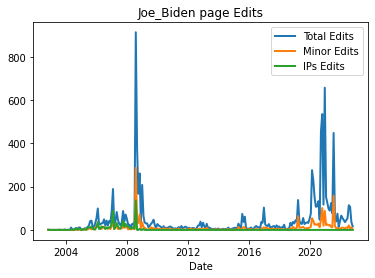

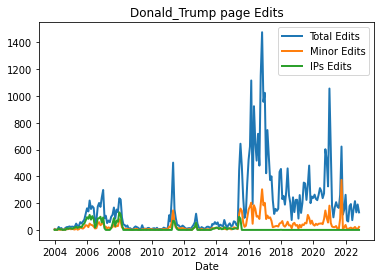

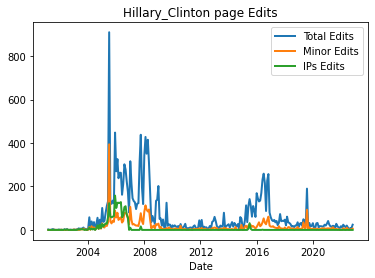

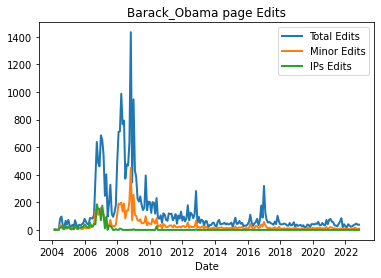

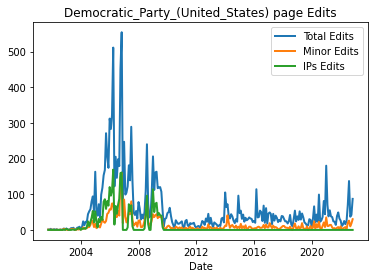

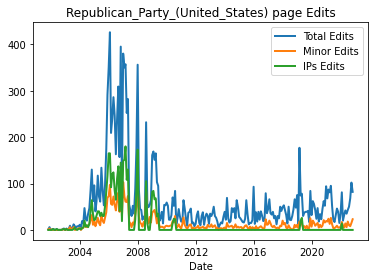

In [130]:
import matplotlib.pyplot as plt 

for page in page_names:
    monthly_edits = dict_of_tables[page]
    
    fig, ax = plt.subplots()
    ax.plot(monthly_edits['Month'], monthly_edits['Edits'], linewidth=2.0)
    ax.plot(monthly_edits['Month'], monthly_edits['Minor edits'], linewidth=2.0)
    ax.plot(monthly_edits['Month'], monthly_edits['IPs'], linewidth=2.0)
    

    ax.legend(['Total Edits','Minor Edits','IPs Edits'])
    plt.xlabel('Date')
    plt.title(page+' page Edits')
    plt.show()

We see there are some repeating 'spikes' whcih may suggest preiodicity. The natural guess is that these spikes occur near importiant political dates. Let's examine each individually and add dashed line for presidential elections ranging from 2004-2020.

In [132]:
# Dates for presidential elections
p_election_2004 = dt.datetime(2004, 11, 8)
p_election_2008 = dt.datetime(2008, 11, 8)
p_election_2012 = dt.datetime(2012, 11, 8)
p_election_2016 = dt.datetime(2016, 11, 8)
p_election_2020 = dt.datetime(2020, 11, 8)

['Joe_Biden',
 'Donald_Trump',
 'Hillary_Clinton',
 'Barack_Obama',
 'Democratic_Party_(United_States)',
 'Republican_Party_(United_States)']

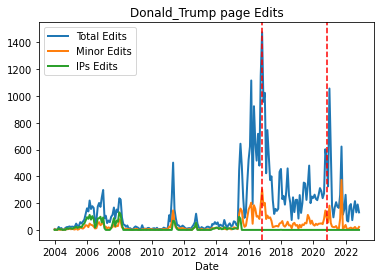

In [141]:
page = 'Donald_Trump'

monthly_edits = dict_of_tables[page]

fig, ax = plt.subplots()
ax.plot(monthly_edits['Month'], monthly_edits['Edits'], linewidth=2.0)
ax.plot(monthly_edits['Month'], monthly_edits['Minor edits'], linewidth=2.0)
ax.plot(monthly_edits['Month'], monthly_edits['IPs'], linewidth=2.0)
ax.legend(['Total Edits','Minor Edits','IPs Edits'])

plt.axvline(p_election_2016, color = 'red', linestyle = 'dashed')
plt.axvline(p_election_2020, color = 'red', linestyle = 'dashed') 
plt.xlabel('Date')
plt.title(page+' page Edits')
plt.show()

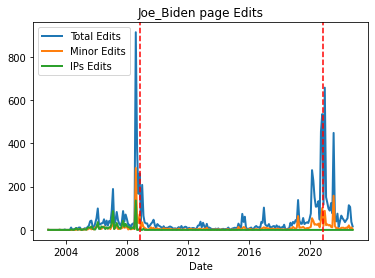

In [142]:
page = 'Joe_Biden'

monthly_edits = dict_of_tables[page]

fig, ax = plt.subplots()
ax.plot(monthly_edits['Month'], monthly_edits['Edits'], linewidth=2.0)
ax.plot(monthly_edits['Month'], monthly_edits['Minor edits'], linewidth=2.0)
ax.plot(monthly_edits['Month'], monthly_edits['IPs'], linewidth=2.0)
ax.legend(['Total Edits','Minor Edits','IPs Edits'])

plt.axvline(p_election_2008, color = 'red', linestyle = 'dashed')
plt.axvline(p_election_2020, color = 'red', linestyle = 'dashed') 
plt.xlabel('Date')
plt.title(page+' page Edits')
plt.show()

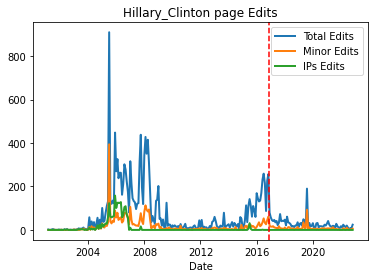

In [144]:
page = 'Hillary_Clinton'

monthly_edits = dict_of_tables[page]

fig, ax = plt.subplots()
ax.plot(monthly_edits['Month'], monthly_edits['Edits'], linewidth=2.0)
ax.plot(monthly_edits['Month'], monthly_edits['Minor edits'], linewidth=2.0)
ax.plot(monthly_edits['Month'], monthly_edits['IPs'], linewidth=2.0)
ax.legend(['Total Edits','Minor Edits','IPs Edits'])

#plt.axvline(p_election_2008, color = 'red', linestyle = 'dashed')
plt.axvline(p_election_2016, color = 'red', linestyle = 'dashed') 
plt.xlabel('Date')
plt.title(page+' page Edits')
plt.show()

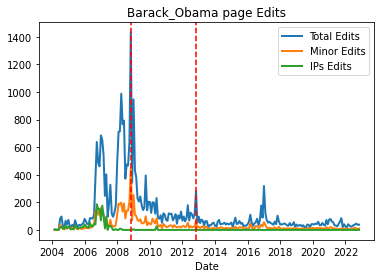

In [146]:
page = 'Barack_Obama'

monthly_edits = dict_of_tables[page]

fig, ax = plt.subplots()
ax.plot(monthly_edits['Month'], monthly_edits['Edits'], linewidth=2.0)
ax.plot(monthly_edits['Month'], monthly_edits['Minor edits'], linewidth=2.0)
ax.plot(monthly_edits['Month'], monthly_edits['IPs'], linewidth=2.0)
ax.legend(['Total Edits','Minor Edits','IPs Edits'])

plt.axvline(p_election_2008, color = 'red', linestyle = 'dashed')
plt.axvline(p_election_2012, color = 'red', linestyle = 'dashed') 
plt.xlabel('Date')
plt.title(page+' page Edits')
plt.show()

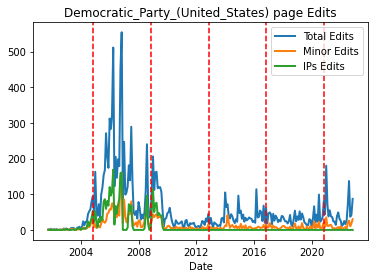

In [149]:
page = 'Democratic_Party_(United_States)'

monthly_edits = dict_of_tables[page]

fig, ax = plt.subplots()
ax.plot(monthly_edits['Month'], monthly_edits['Edits'], linewidth=2.0)
ax.plot(monthly_edits['Month'], monthly_edits['Minor edits'], linewidth=2.0)
ax.plot(monthly_edits['Month'], monthly_edits['IPs'], linewidth=2.0)
ax.legend(['Total Edits','Minor Edits','IPs Edits'])

plt.axvline(p_election_2004, color = 'red', linestyle = 'dashed')
plt.axvline(p_election_2008, color = 'red', linestyle = 'dashed') 
plt.axvline(p_election_2012, color = 'red', linestyle = 'dashed')
plt.axvline(p_election_2016, color = 'red', linestyle = 'dashed') 
plt.axvline(p_election_2020, color = 'red', linestyle = 'dashed') 
plt.xlabel('Date')
plt.title(page+' page Edits')
plt.show()

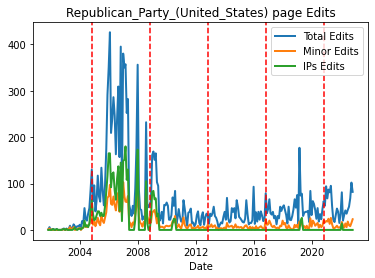

In [150]:
page = 'Republican_Party_(United_States)'

monthly_edits = dict_of_tables[page]

fig, ax = plt.subplots()
ax.plot(monthly_edits['Month'], monthly_edits['Edits'], linewidth=2.0)
ax.plot(monthly_edits['Month'], monthly_edits['Minor edits'], linewidth=2.0)
ax.plot(monthly_edits['Month'], monthly_edits['IPs'], linewidth=2.0)
ax.legend(['Total Edits','Minor Edits','IPs Edits'])

plt.axvline(p_election_2004, color = 'red', linestyle = 'dashed')
plt.axvline(p_election_2008, color = 'red', linestyle = 'dashed') 
plt.axvline(p_election_2012, color = 'red', linestyle = 'dashed')
plt.axvline(p_election_2016, color = 'red', linestyle = 'dashed') 
plt.axvline(p_election_2020, color = 'red', linestyle = 'dashed') 
plt.xlabel('Date')
plt.title(page+' page Edits')
plt.show()

## Why the mass of edits in 2007?

In all plots we see there is a mass of edits in 2007. Interestingly enough this is observed in another data set. Namely, the data set used in Milestone one. In particular, we consider for a moment the [Monthly wikimedia editor activity data set](https://meta.wikimedia.org/wiki/Research:Monthly_wikimedia_editor_activity_dataset). This data set includes the following information: 
* wiki -- The dbname of the wiki in question ("enwiki" == English Wikipedia, "commonswiki" == Commons)
* month -- YYYYMM
* user_id -- The user's identifier in the local wiki
* user_name -- The user name in the local wiki (from the 'user' table)
* user_registration -- The recorded registration date for the user in the 'user' table
* archived -- The count of deleted revisions saved in this month by this user
* revisions -- The count of all revisions saved in this month by this user (archived or not)
* attached_method -- The method by which this user attached this account to their global account

The last complete month in the dataset is June, 2015.

For more details [click here](https://diff.wikimedia.org/2015/09/25/wikipedia-editor-numbers/).The data extraction, loading, and cleaning is streamlined in the cell below. 

In [151]:
df = pd.read_table("wiki_editor_months.201508.tsv")
df_english = df[df['wiki']=='enwiki'].iloc[:,1:].reset_index(drop = True)
#define auxilary get month and year from date encoded as int dtype.
def get_month(entry):
    return str(entry)[4:6]
def get_year(entry):
    return str(entry)[:4]

df_english['month']= df_english['month'].map(get_month)+'-'+df_english['month'].map(get_year) 
df_english['month'] = pd.to_datetime(df_english['month'], format='%m-%Y')

df_english['user_registration']=df_english['user_registration'].map(get_month)+'-'+df_english['user_registration'].map(get_year)
df_english['user_registration']=pd.to_datetime(df_english['user_registration'], format='%m-%Y',errors='coerce')
df_english['non_archived'] = df_english['revisions']-df_english['archived']
df_english['user_name_has_bot'] = df_english['user_name'].apply(lambda x: 'bot' in str(x))
df_english = df_english[['month', 'user_id', 'user_name','user_name_has_bot', 'user_registration', 'archived',
       'non_archived', 'revisions', 'attached_method']] #reorder columns
df_english.head(5)

/var/folders/9d/yr4h51qx3ggdvydfff3h7h0m0000gn/T/ipykernel_27711/195535701.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_table("wiki_editor_months.201508.tsv")


,month,user_id,user_name,user_name_has_bot,user_registration,archived,non_archived,revisions,attached_method
0,2001-01-01,9161929,KlausSeistrup,False,2009-03-01,0.0,1.0,1.0,new
1,2001-01-01,9167505,ALittleLuck,False,2009-03-01,0.0,1.0,1.0,new
2,2001-01-01,10164500,IvoryRing,False,2009-07-01,0.0,1.0,1.0,new
3,2001-01-01,10164531,StasK,False,2009-07-01,1.0,1.0,2.0,primary
4,2001-01-01,10164597,ChessyPig,False,2009-07-01,0.0,1.0,1.0,new


Using this data set we can unconver some insight on editors on wikipedia. If we consider the number of new users per month we see there is a large spike in 2007, with the number of new users seemingly growing exponentilaly near 2004.

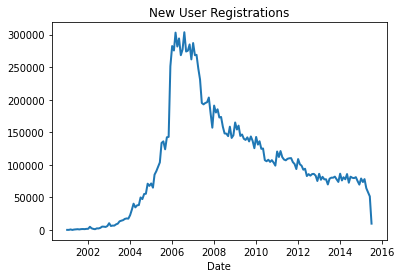

In [152]:
data_user_registration =  df_english['user_registration'].value_counts().sort_index()

fig, ax = plt.subplots()

ax.plot(data_user_registration.index, data_user_registration.values, linewidth=2.0)
plt.xlabel('Date')
plt.title('New User Registrations')
plt.show()

Moreover, if we consider the edit trends, we obesrve a large increase in edits late 2006. This is consistent with our observation of new user growth. As the number of users increase, we can expect more edits to be made.

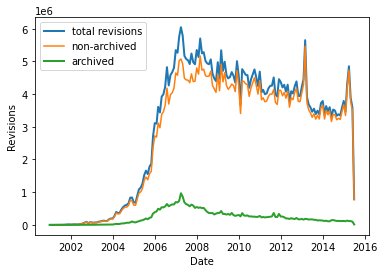

In [153]:
data_non_archived = df_english.groupby('month')['non_archived'].sum()
data_archived = df_english.groupby('month')['archived'].sum()
data_revisions = df_english.groupby('month')['revisions'].sum()

fig, ax = plt.subplots()

ax.plot(data_revisions.index, data_revisions.values, linewidth=2.0)
ax.plot(data_non_archived.index, data_non_archived.values)
ax.plot(data_archived.index, data_archived.values, linewidth=2.0)

ax.legend(['total revisions','non-archived', 'archived'])
plt.xlabel('Date')
plt.ylabel('Revisions')

plt.show()

This large increase near 2006 is also present in the prvious plots of edits for individual political figure pages.